# **Final Project**
# DATA 3300

# **Part 1: Data Preparation & Understanding**

### **Data Preparation**

**Importing the `manager_performance.csv` dataset into Python, and cleaning/transforming this data set.**




### **Data Transformations & Assumptions Outline**

* **Manager_ID**
  * **Action**: Set as index.
  * **Assumption**: All values appear correct with no duplicates so it can be used as the index.
* **First_Name**
  * **Action**: Column removed.
  * **Assumption**: The column personally identifies the manager, which is unnecessary for our analysis.
* **Last_Name**
  * **Action**: Column removed.
  * **Asumption**: Same as First_Name.
* **Age**
  * **Action**: Column removed.
  * **Assumption**: Using age in the analysis would be discriminatory.
* **Time_Employed**
  * **Action**: `O` changed to `0`.
  * **Assumption**: The value was entered by mistake, but was intended to mean `0`.
* **Num_Prev_Positions**
  * **Action**: `three` changed to `3`.
  * **Assumption**: The word was input as a string rather than a number in integer form, but this can be reverted.
* **Teamwork**
  * **Action**: No change.
  * **Assumption**: All values appear correct with only values 1-10 used.
* **Motivation**
  * **Action**: No change.
  * **Assumption**: All values appear correct with only values 1-10 used.
* **Leadership**
  * **Action**: `100` changed to `10`
  * **Assumption**: Because the allowed values are 1-10, `100` is assumed to be a clerical error where an extra zero was added or the intended purpose was 100%, which would be `10` on our scale
* **Performance_Evaluation**
  * **Action_1**: Whitespace removed.
  * **Assumption_1**: Extra whiteshpae was not necessary to display the inteded value.
  * **Action_2**: `highgh` changed to `high`.
  * **Assumption_2**: A clerical error allowed for extra letters to be added to the response.
  * **Action_3**: `loow` changed to `low`.
  * **Assumption_3**: A clerical error allowed for extra letters to be added to the response.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_data = pd.read_csv("/content/manager_performance.csv")
df_data

,Manager_ID,First_Name,Last_Mame,Age,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,James,Butt,44,8,2,4,10,8,high
1,2,Josephine,Darakjy,49,4,3,8,7,8,high
2,3,Art,Venere,70,3,3,1,7,5,low
3,4,Lenna,Paprocki,34,9,1,4,4,5,low
4,5,Donette,Foller,39,7,3,3,2,10,low
...,...,...,...,...,...,...,...,...,...,...
995,996,Avery,Veit,69,12,1,7,2,8,high
996,997,Reid,Euresti,38,0,3,5,8,2,low
997,998,Charlette,Brenning,27,3,3,6,1,1,low
998,999,Celestina,Keeny,46,7,1,1,5,10,low


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Manager_ID              1000 non-null   int64 
 1   First_Name              1000 non-null   object
 2   Last_Mame               1000 non-null   object
 3   Age                     1000 non-null   int64 
 4   Time_Employed           1000 non-null   object
 5   Num_Prev_Positions      1000 non-null   object
 6   Teamwork                1000 non-null   int64 
 7   Motivation              1000 non-null   int64 
 8   Leadership              1000 non-null   int64 
 9   Performance_Evaluation  1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


First, `Age` is dropped as it could be used to discriminate, `Last_Mame` and `First_Name` can be removed as they personally identify the manager, and `Manager_ID` is set as the index.

In [ ]:
df_data = df_data.drop(['Age','First_Name','Last_Mame'], axis=1)
df_data = df_data.set_index('Manager_ID')

Next, the values need to be assessed and changed. For the columns with integer values, all of the values can be displayed so that incorrect values can quickly be identified and changed.


In [ ]:
df_data['Time_Employed'].value_counts()

8     71
5     71
10    68
1     66
0     65
12    65
13    64
15    63
6     61
2     61
11    60
7     60
3     60
9     59
4     53
14    52
O      1
Name: Time_Employed, dtype: int64

The value `O` is assumed to be `0`.

In [ ]:
df_data = df_data.replace({'O':0})

In [ ]:
df_data['Num_Prev_Positions'].value_counts()

0        260
1        258
3        249
2        232
three      1
Name: Num_Prev_Positions, dtype: int64

The value `three` is assumed to be `3`.

In [ ]:
df_data = df_data.replace({'three':3})

In [ ]:
df_data['Teamwork'].value_counts()

1     112
2     111
5     109
6     107
4     103
3      98
8      96
10     91
9      89
7      84
Name: Teamwork, dtype: int64

All values in `Teamwork` are valid.

In [ ]:
df_data['Motivation'].value_counts()

7     115
1     115
4     104
3     104
2     100
6      97
8      95
10     91
5      91
9      88
Name: Motivation, dtype: int64

All values in `Motivation` are valid.

In [ ]:
df_data['Leadership'].value_counts()

2      116
3      111
1      104
9      101
6       98
10      97
7       97
4       96
8       92
5       87
100      1
Name: Leadership, dtype: int64

100 is not a valid entry. As the column allows for values 1-10, `100` is assumed to be `10`.

In [ ]:
df_data['Leadership'] = df_data['Leadership'].replace({100:10})

In [ ]:
df_data['Performance_Evaluation'].value_counts()

low       686
high      309
high        3
highgh      1
loow        1
Name: Performance_Evaluation, dtype: int64

The only allowed values are `high` and `low`. Whitespace will be removed, `highhgh` will be assumed to be `high` and `loow` will be assumed to be `low`.

In [ ]:
df_data['Performance_Evaluation'] = df_data['Performance_Evaluation'].str.strip()
df_data['Performance_Evaluation'] = df_data['Performance_Evaluation'].replace({'highgh':'high','loow':'low'})

The cleaned dataset can now be displayed

In [ ]:
df_data.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
Manager_ID,,,,,,
1,8,2,4,10,8,high
2,4,3,8,7,8,high
3,3,3,1,7,5,low
4,9,1,4,4,5,low
5,7,3,3,2,10,low


### **Data Understanding:**




* **Time Employed:** Ratio (continuous)
* **Num Prev Positions:** Ratio (discrete)
* **Teamwork:** Ordinal
* **Motivation:** Ordinal
* **Leadership:** Ordinal
* **Performance Evaluation:** Nominal (binomial)

In [ ]:
df_datac = pd.read_csv('/content/manager_performance_clean.csv')
df_datac.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# Each column printed seperately for better readability
# print(df_datac[['Time_Employed','Performance_Evaluation']].groupby('Performance_Evaluation').describe())
# print(df_datac[['Num_Prev_Positions','Performance_Evaluation']].groupby('Performance_Evaluation').describe())
# print(df_datac[['Teamwork','Performance_Evaluation']].groupby('Performance_Evaluation').describe())
# print(df_datac[['Motivation','Performance_Evaluation']].groupby('Performance_Evaluation').describe())
# print(df_datac[['Leadership','Performance_Evaluation']].groupby('Performance_Evaluation').describe())
describe_data = df_datac.drop("Manager_ID", axis=1)
describe_data.groupby('Performance_Evaluation').describe().stack()

Time_Employed  Num_Prev_Positions    Teamwork  \
Performance_Evaluation                                                        
high                   count     313.000000          313.000000  313.000000   
                       mean        8.897764            1.942492    6.805112   
                       std         4.138906            0.942183    2.577710   
                       min         0.000000            0.000000    1.000000   
                       25%         6.000000            1.000000    5.000000   
                       50%         9.000000            2.000000    7.000000   
                       75%        12.000000            3.000000    9.000000   
                       max        15.000000            3.000000   10.000000   
low                    count     687.000000          687.000000  687.000000   
                       mean        6.783115            1.257642    4.605531   
                       std         4.644926            1.139918    2.724497   
                       min         0.000000            0.000000    1.000000   
                       25%         3.000000            0.000000    2.000000   
                       50%         6.000000            1.000000    4.000000   
                       75%        11.000000            2.000000    7.000000   
                       max        15.000000            3.000000   10.000000   

                              Motivation  Leadership  
Performance_Evaluation                                
high                   count  313.000000  313.000000  
                       mean     6.974441    6.738019  
                       std      2.373596    2.664172  
                       min      1.000000    1.000000  
                       25%      6.000000    5.000000  
                       50%      7.000000    7.000000  
                       75%      9.000000    9.000000  
                       max     10.000000   10.000000  
low                    count  687.000000  687.000000  
                       mean     4.605531    4.761281  
                       std      2.771707    2.813143  
                       min      1.000000    1.000000  
                       25%      2.000000    2.000000  
                       50%      4.000000    4.000000  
                       75%      7.000000    7.000000  
                       max     10.000000   10.000000

**Two hypotheses regarding factors driving employee performance evaluations.**



1.   Over time, managers perform better based on the correlation between high performance evaluation and number of years employed.
2.   Corporate expects managers to efficiently delegate work to their subordinates, so when evaluating managers those who work well as a team received high performance evaluations.




**Data visualization that distinguishes between high-and low-performers in the dataset.**

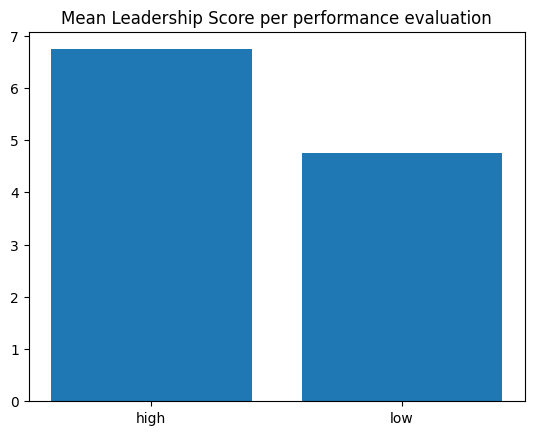

In [ ]:
group_averages = df_datac[['Leadership','Performance_Evaluation']].groupby('Performance_Evaluation').mean()
plt.bar(x = group_averages.index.values, height = group_averages['Leadership'])

# plt.pie(df_datac['Performance_Evaluation'].value_counts().values, labels = df_datac['Performance_Evaluation'].value_counts().index.values,autopct = '%1.1f%%')
plt.title("Mean Leadership Score per performance evaluation")
plt.show()
# replace with code to produce plot -- see Module 3 cheat sheet or ICE for code on producing visualizations

Caption: Of the managers evaluated, the average `Leadership` score for managers with `low` evaluations was about 5, whereas managers who received `high` evaluations had an average `Leadership` score of ~6.75.

**Correlation matrix that includes all candidate independent variables.**

In [ ]:
cor_matrix2 = df_datac.drop('Manager_ID',axis=1).corr() #run correlation matrix
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
Time_Employed,1.000000,0.060079,-0.034257,0.036908,-0.027508
Num_Prev_Positions,0.060079,1.000000,-0.027816,0.011512,-0.028756
Teamwork,-0.034257,-0.027816,1.000000,0.002309,-0.010993
Motivation,0.036908,0.011512,0.002309,1.000000,-0.029894
Leadership,-0.027508,-0.028756,-0.010993,-0.029894,1.000000


There are not any correlation coefficients greater than 0.6, all of the values are relatively low. None of the variables will need to be removed because of multicollinearity.

# **Part 2: Unsupervised DM**



For this analysis I picked to do a clustering analysis over a association rules analysis. This is because with the business objective "to predict the outcome of a managers performance evaluation based on a number of individual characteristics" witch the correlation analysis will do by analizing continous varibles to measure linear relationships, Vs the assosiation which would only take bianry data and finds non-linear relationships which arent helpful in this situation. The parameters that we changed are that there are only 2 clusters, this is because we just want to seperate high and low preformers (which the business told us).

In [ ]:
!pip install kneed

In [ ]:
# replace with code to import required libraries and packages to perform unsupervised technique -- see that module's cheat sheet or ICE assignment
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df_clustering = pd.read_csv("/content/manager_performance_clean.csv")
df_clustering.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# replace with code to dummy code categorical variables (rename df)
df_clustering = pd.get_dummies(data = df_clustering, drop_first = True)
df_clustering.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
0,1,8,2,4,10,8,0
1,2,4,3,8,7,8,0
2,3,3,3,1,7,5,1
3,4,9,1,4,4,5,1
4,5,7,3,3,2,10,1


In [ ]:
x = df_clustering.drop(['Manager_ID'], axis=1)

In [ ]:
#replace with code to create an object called features that drops the ID
#replace with code to preview
features = df_clustering.drop(['Manager_ID'], axis =1)
features.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
0,8,2,4,10,8,0
1,4,3,8,7,8,0
2,3,3,1,7,5,1
3,9,1,4,4,5,1
4,7,3,3,2,10,1


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)

[[ 0.12080363  0.46866892 -0.45173117  1.62148164  0.89952078 -1.4815155 ]
 [-0.74985316  1.35629945  0.94465575  0.57603893  0.89952078 -1.4815155 ]
 [-0.96751736  1.35629945 -1.49902136  0.57603893 -0.13046485  0.6749845 ]
 ...
 [-0.96751736  1.35629945  0.24646229 -1.51484649 -1.50377901  0.6749845 ]
 [-0.09686057 -0.41896161 -1.49902136 -0.12092287  1.58617786  0.6749845 ]
 [ 1.42678882 -1.30659214 -0.45173117 -0.46940378 -0.13046485  0.6749845 ]]


In [ ]:
kmeans = KMeans(
    init="random", #random initialization
    n_clusters = 2,
    n_init = 10, #number of random initializations, leave this set to 10
    max_iter=300, #number of iterations in clustering analysis in recalculating centroids
    random_state=42, #42 is arbitrary, set to a specific number for reproducibility purposes
)

In [ ]:
kmeans.fit(scaled_features)
kmeans.inertia_

4502.613701893344

In [ ]:
# replace with code to create table of relevant results, save to object called 'centroid_table'
centroids = kmeans.cluster_centers_
centroid_table = pd.DataFrame(centroids,
                              columns = ["Time_Employed", "Num_Prev_Positions", "Teamwork", "Motivation", "Leadership","Performance_Evaluation"],
                              index =['Cluster_0', 'Cluster_1'])
centroid_table

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
Cluster_0,-0.144069,-0.190271,-0.240342,-0.258388,-0.212424,0.674985
Cluster_1,0.316215,0.417623,0.527524,0.567132,0.466247,-1.481516


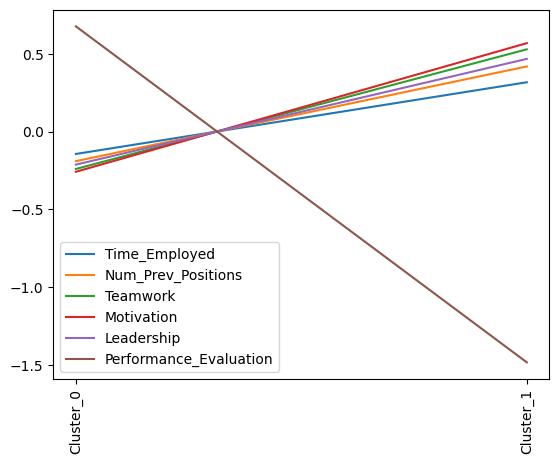

In [ ]:
 # I've provided this code to indicate how to produce a centroid plot -- since it requires some additional steps from what was done in the ICE
ax = centroid_table.plot()
ax.set_xticks(range(0,len(centroid_table))) # this sets the number of ticks on the x-axis to your number of clusters
ax.set_xticklabels(centroid_table.index.values, rotation=90) # this sets your tick labels on the x-axis to your cluster labels
plt.show()

From the Centroid table plot you can see that if you are grouped into cluster 1 you are more likely to preforme higher and get a promotion over being grouped into cluster 0. All the varibles (time employed, number of previous positions, teamwork, motivation, and leadership) all are above 0 in cluser 1 therfore preforme above the mean.


### **Visualization**


In [ ]:
motivation_average = df_datac[['Motivation','Performance_Evaluation']].groupby('Performance_Evaluation').mean()

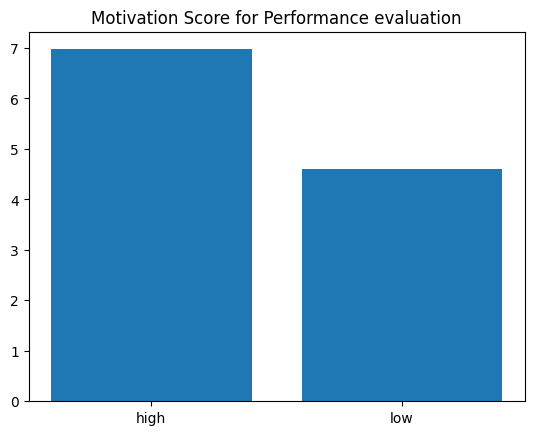

In [ ]:
plt.title("Motivation Score for Performance evaluation")
plt.bar(x = motivation_average.index.values, height = motivation_average['Motivation'])
plt.show()

Caption: With all the managers evaluated, the average motivation score for managers who preformed low was about 5, while the motivation scores for high performers is about 7.

# **Part 3: Supervised DM Technque 1**





Decision trees analysis would be best because based on the data set we are trying to predict whether or not a manager is a high or low performer. Based on this information we are predicting which side the dependent variable falls relative to a line. Whereas linear regression is predicting where on a line the predicted value falls.


**Train and evaluate model using 10-fold cross-validation and provide any relevant plots and results.**

> **Use a 80-20 training and test-set split, then perform 10-fold cross validation on the training set. For this model, setting `min_samples_leaf` to 9, `max_depth` to 10, and `criterion` to "gini". Evaluate the cross-validated accuracy, kappa, lift, precision, recall, and f-measure; then generate a confusion matrix to compare the actual classes of the DV from the training set (e.g., y_train), against the predicted classes (y_pred).**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #needed for reading in data, dataframe/variable manipulation, preprocessing

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics # sklearn packages needed to run cross-validation and evaluate model performance

from sklearn.linear_model import LogisticRegression # sklearn function for Logistic Regression

import warnings
warnings.filterwarnings("ignore") #needed for developing and evaluating decision tree model

import seaborn as sns #needed to visualize confusion matrix
import graphviz

df = pd.read_csv("/content/manager_performance_clean.csv")
df.head()# replace with code to import required libraries and packges to perform supervised technique -- refer to relevant module ICE and cheat sheet

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
x = df.drop(['Manager_ID', 'Performance_Evaluation'], axis=1)
x = pd.get_dummies(data = x, drop_first = True)
x.head()
y = df['Performance_Evaluation']# replace with code to create x and y objects -- perform any necessary preprocessing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)# replace with code to perform training-test split

In [ ]:
model = DecisionTreeClassifier(criterion = "gini", random_state=100,
                               max_depth=10, min_samples_leaf=9)
#can change parameters for criterion (gini, entropy, or log_loss), max_depth, min_samples_leaf, min_impurity_decrease

model.fit(x_train, y_train)# replace with code to specify model and set parameters (if necessary)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=9, random_state=100)

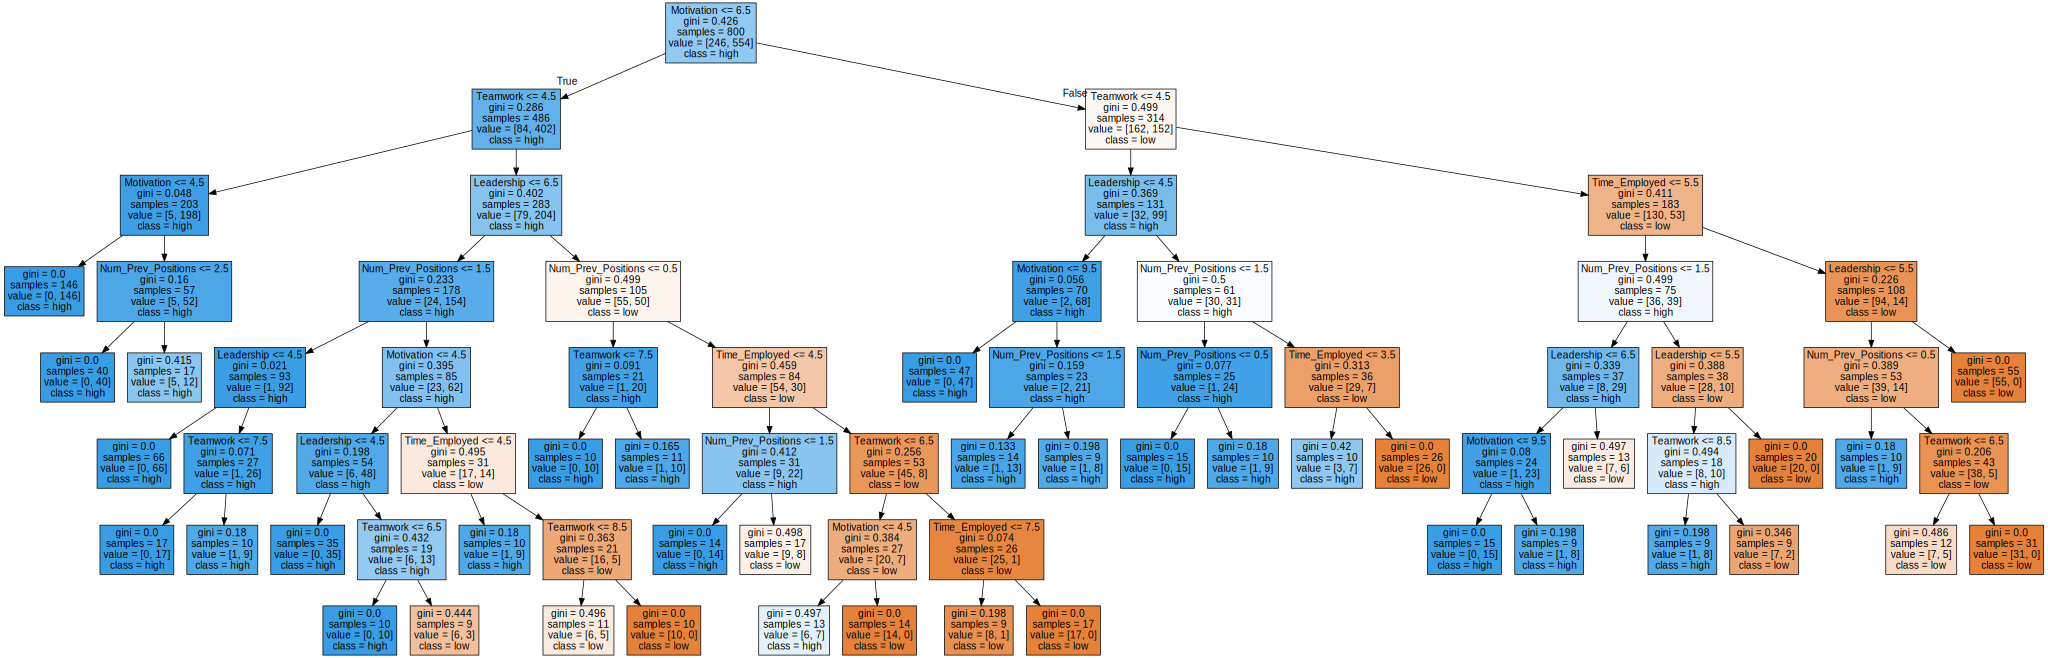

In [ ]:
labels = y.value_counts()
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=x.columns,
                                class_names=labels.index.values,
                                filled=True) #plot model

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph# replace with code to produce tree plot on training data

In [ ]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

model = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=10, min_samples_leaf=9)# replace with code to specify cross-validatin parameters -- see model performance cheat sheet for these next few steps

In [ ]:
scoring = {'acc': 'accuracy',
           'f1' : 'f1',
           'precision': 'precision',
           'recall': 'recall',
           'roc_auc': 'roc_auc',
           'r2': 'r2'}

scores = cross_validate(model, x_train, y_train, scoring = scoring,cv=cv,return_train_score=False)

scores = pd.DataFrame(scores, columns = scores.keys())
scores.mean()


fit_time          0.006677
score_time        0.018821
test_acc          0.875000
test_f1                NaN
test_precision         NaN
test_recall            NaN
test_roc_auc      0.935206
test_r2                NaN
dtype: float64

In [ ]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)
x_train['predicted_class'] = y_pred # add predictions to x_train dataframe
x_train['actual_class'] = y_train# replace with code to make cross-validated predictions

In [ ]:
print(classification_report(y_pred, y_train)) # produces overall accuracy, precision, recall and f1

metrics.cohen_kappa_score(y_pred, y_train)# replace with code to produce required performance evaluation metrics; you may want to break this up into multiple code cells

              precision    recall  f1-score   support

        high       0.78      0.81      0.79       236
         low       0.92      0.90      0.91       564

    accuracy                           0.88       800
   macro avg       0.85      0.86      0.85       800
weighted avg       0.88      0.88      0.88       800



0.7031407706465593

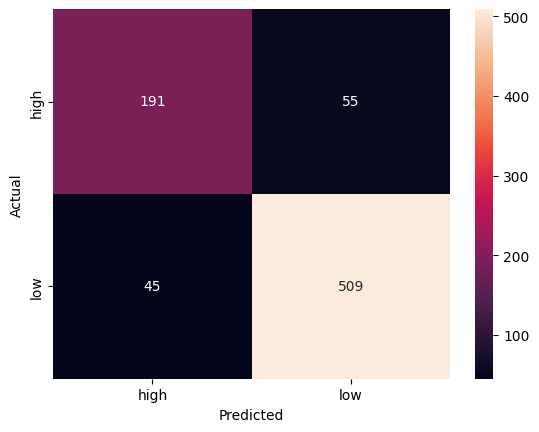

In [ ]:
conf = pd.DataFrame(x_train, columns=['actual_class','predicted_class'])
confusion_matrix = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(12,10)})
plt.show()# replace with code to produce confusion matrix

**Results interpretation for results generated:**
* **Cross-Validated Accuracy:** Our model's accuracy is 88.88% which is more than 11% better than the baseline accuracy of 68.7%. this improvement justifies the use of the model to predict voter intent.
* **Kappa:** Kappa = 0.703 which measures how well the model performes above chance. close to 1 is better.
* **Lift:** Model performs 1.32 times better than the baseline at identifying correctly a low scoring evaluation.
* **Precision:** The precision for the positive class is 92%.35% which means that of all predicted cases, we were right that percent fo the time. It should be used when the cost of FPs is greater.
* **Recall:** Recall is 90% which means that of all cases that were actually Low scoring evaluations, we correctly predicted a low score that percent of the time. When cost of Fns are greater.
* **F-Measure:** f1 = 0.91 or 91%. This is the harmonic mean of precision and recall and takes both into account. Closer to 1 is better.

Based on the class distribution which is skewed, and the higher cost of the False Negative (predicting a high evaluation score when in fact it was low), Recall will be our focus parameter.

## **Visualization**


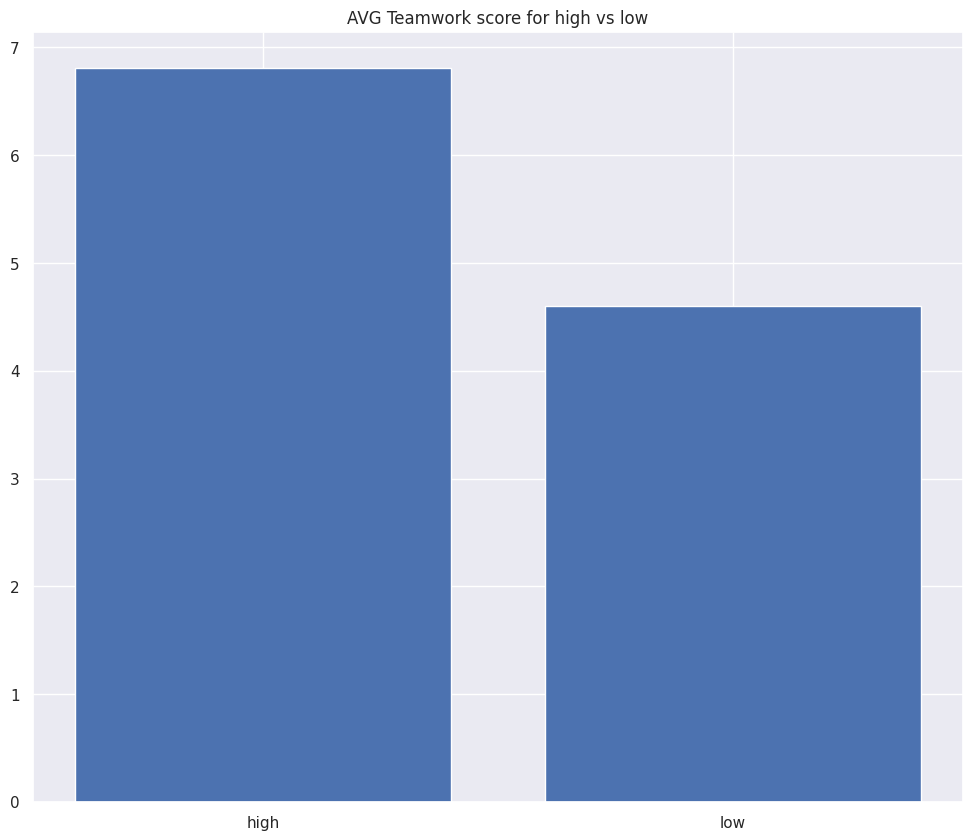

In [ ]:
group_averages = df[['Teamwork','Performance_Evaluation']].groupby(by = "Performance_Evaluation").mean()
plt.bar(x = group_averages.index.values, height = group_averages['Teamwork'])
plt.title("AVG Teamwork score for high vs low")
plt.show()# replace with code for producing plot -- see Module 3 ICE and cheat sheet for code on producing visualizations

Caption: Managers with higher average Teamwork scores tend to have higher performance scores.

# **Part 4: Supervised DM Technique 2**



To complete this phase of the data analysis we have chosen the logistic regression model. The data set looks to predict a target variable (DV) that is binomial with an outcome of high, or low. Logistic regression is a classification model which is will be useful in this analysis to classify between these 2 evaluation results.


**Train and evaluate model using 10-fold cross-validation and provide relevant plots and results. Interpret these results based on the positive class being `Performance_Evaluation_low`.**

> **Use a 80-20 training and test-set split, then performing 10-fold cross validation on the training set. Evaluating the cross-validated accuracy, kappa, lift, precision, recall, and f-measure; then generate a confusion matrix to compare the actual classes of the DV from the training set (e.g., y_train), against the predicted classes (y_pred).**


> **When performing the `train_test_split`, set your `test_size = 0.2`, `random_state` to 100.**

> **When performing cross-validation, set your random_state to 1. Failing to complete this step may results in your group members having different training and test sets and different cross-validation results!!!**


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # libraries for data manipulation and visualizations
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics # functions from sklearn to perform cross-validation, and evaluate model performance
from sklearn.linear_model import LogisticRegression# replace with code to import required libraries and packges to perform supervised technique -- refer to relevant module ICE and cheat sheet

In [ ]:
df = pd.read_csv("manager_performance_clean.csv")
print(df.head())
x = df.drop(['Manager_ID','Performance_Evaluation'], axis = 1) # create 'x' object from IVs, exclude primary key and DV
x = pd.get_dummies(data = x, drop_first = True) # dummy code categorical variables
print(x.head())
y = df['Performance_Evaluation'] # create 'y' object for DV
y = pd.get_dummies(data = y, drop_first = True) # dummy code DV
print(y.head())# replace with code to create x and y objects -- perform any necessary preprocessing

   Manager_ID  Time_Employed  Num_Prev_Positions  Teamwork  Motivation  \
0           1              8                   2         4          10   
1           2              4                   3         8           7   
2           3              3                   3         1           7   
3           4              9                   1         4           4   
4           5              7                   3         3           2   

   Leadership Performance_Evaluation  
0           8                   high  
1           8                   high  
2           5                    low  
3           5                    low  
4          10                    low  
   Time_Employed  Num_Prev_Positions  Teamwork  Motivation  Leadership
0              8                   2         4          10           8
1              4                   3         8           7           8
2              3                   3         1           7           5
3              9                   1 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100) # create a training and test set from x and y, using an 80-20 training/test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)# replace with code to perform training-test split

(800, 5)
(200, 5)
(800, 1)
(200, 1)


In [ ]:
x_train_Sm = sm.add_constant(x_train) # adds a constant (y-intercept) to x_train
log_reg = sm.Logit(y_train, x_train_Sm).fit() # fits a Logit model
print(log_reg.summary()) # replace with code to print the summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    low   No. Observations:                  800
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                     inf
Time:                        05:01:13   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.1770      1.411     12.881      0.000      15.411      20.943
Time_Emplo

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

model = LogisticRegression()# replace with code to specify cross-validatin parameters -- see model performance cheat sheet for these next few steps
# replace with code to specify model

In [ ]:
scoring = {'acc': 'accuracy',
           'f1' : 'f1',
           'precision': 'precision',
           'recall': 'recall',
           'roc_auc': 'roc_auc',
           'r2': 'r2'}# replace with code to create scoring dictionary

In [ ]:
scores2 = cross_validate(model, x_train, y_train, scoring = scoring,cv=cv,return_train_score=False)# replace with code to run cross-validated model and produce evaluation metric scores

In [ ]:
scores2 = pd.DataFrame(scores2, columns = scores.keys())
scores2.mean()# replace with code to show scores output

fit_time          0.026924
score_time        0.112250
test_acc          0.878750
test_f1           0.912488
test_precision    0.903454
test_recall       0.923077
test_roc_auc      0.953672
test_r2           0.421233
dtype: float64

In [ ]:
df['Performance_Evaluation'].value_counts()

low     687
high    313
Name: Performance_Evaluation, dtype: int64

In [ ]:
print('baseline accuracy =', 687/len(df))

baseline accuracy = 0.687


In [ ]:
print('lift =', 0.903/0.687)

lift = 1.3144104803493448


<function matplotlib.pyplot.show(close=None, block=None)>

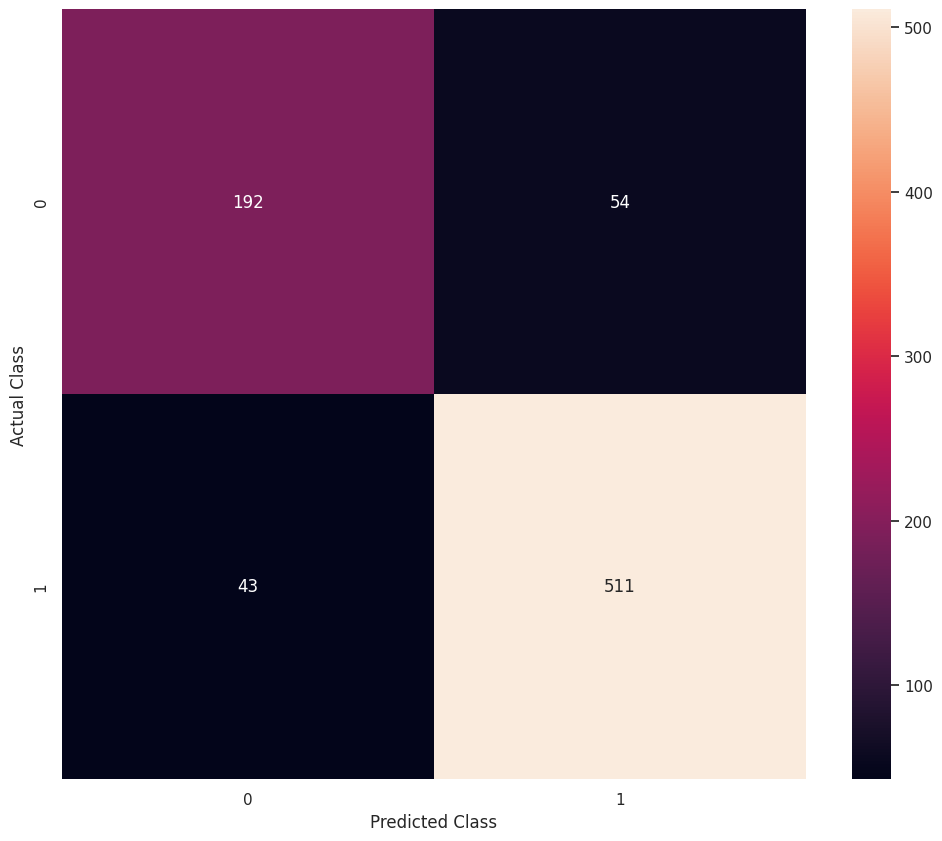

In [ ]:
y_pred = cross_val_predict(model, x_train, y_train, cv=cv) # create y_pred object
conf = confusion_matrix(y_train, y_pred) # generate confusion matrix of y_train (actual) against y_pred

sns.heatmap(conf, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(12,10)})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show # display in heatmap # replace with code to produce confusion matrix

In [ ]:
metrics.cohen_kappa_score(y_train, y_pred)# replace with code to generate any additional evaluation metrics required -- may want to split out into multiple code cells

0.7117170666468534

**Results Interpretation for the results:**

* **Cross-Validated Accuracy:** Our model's accuracy is 87.87% which is more than 10% better than the baseline accuracy of 68.7%. this improvement justifies the use of the model to predict voter intent.
* **Kappa:** Kappa = 0.712 which measures how well the model performes above chance. close to 1 is better.
* **Lift:** Model performs 1.31 times better than the baseline at identifying correctly a low scoring evaluation.
* **Precision:** The precision for the positive class is 90.35% which means that of all predicted cases, we were right that percent fo the time. It should be used when the cost of FPs is greater.
* **Recall:** Recall is 92.31% which means that of all cases that were actually Low scoring evaluations, we correctly predicted a low score that percent of the time. When cost of Fns are greater.
* **F-Measure:** f1 = 0.9125 or 91.25%. This is the harmonic mean of precision and recall and takes both into account. Closer to 1 is better.

Based on the class distribution which is skewed, and the higher cost of the False Negative (predicting a high evaluation score when in fact it was low), Recall will be our focus parameter.

## **Visualization**


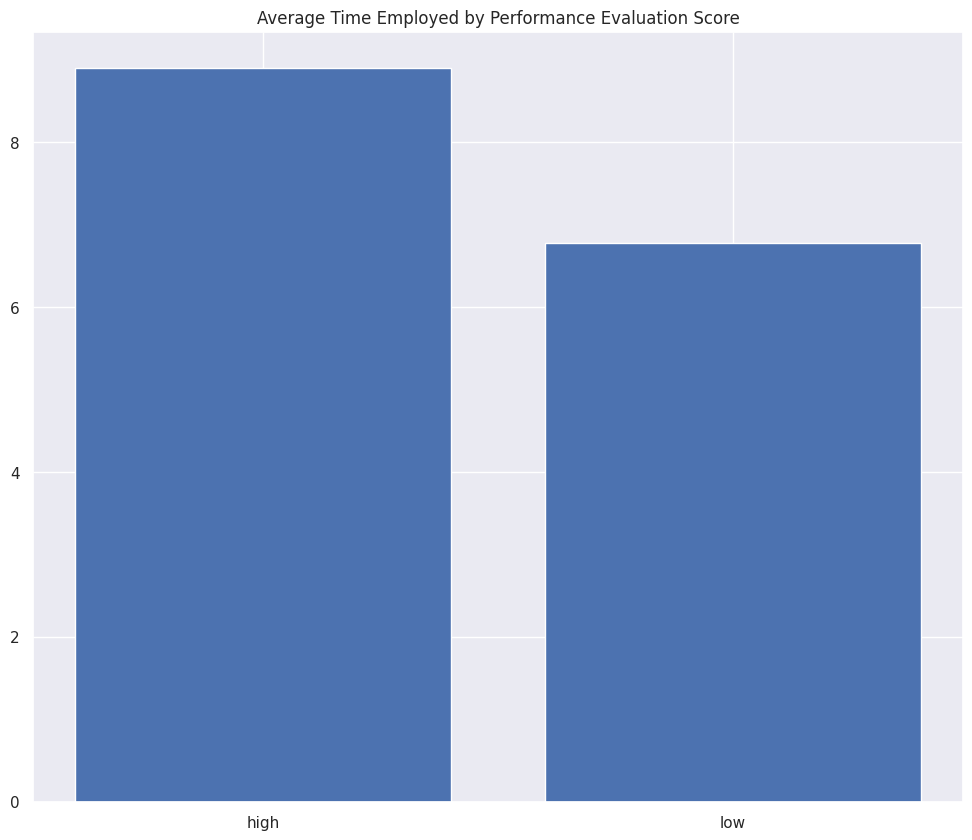

In [ ]:
group_averages = df[['Time_Employed','Performance_Evaluation']].groupby(by = "Performance_Evaluation").mean()
plt.bar(x = group_averages.index.values, height = group_averages['Time_Employed'])
plt.title('Average Time Employed by Performance Evaluation Score')
plt.show()# replace with code to produce plot -- see Module 3 ICE or cheat sheet for how to produce visualizations

Caption: Shows that managers who were given a high rating were employed for longer on average.

 # **Part 5: Evaluation of Models & Business Recommendations**

**Compare the results of the two supervised DM technqiues by presenting their scores in a dataframe in the form of a table. The index should be set to indicate the model (e.g., model_1, model_2), and the columns should indicate the evaluation metric (e.g., precision, recall, etc.). You may choose to include all evaluation metrics, or just the ones you deem relevant. Make sure to at least include those that are most critical in determining the best-performing model for this given dataset.**

> **Save each relevant metric score to an object called model_ for each model, e.g. `model_1 = (0.1, 0.3, 0.4, 0.5)`**

**Then combine each model scores into one `models` object, as was completed in the model performance ICE, to produce a comparison table.**

In [ ]:
model_1 = (0.875,0.91,0.92,0.90,0.94)
model_2 = (0.879,0.912,0.903,0.923,0.954)
models = model_1, model_2
model_compare = pd.DataFrame(data = models,
                             index = ["model_1","model_2"],
                             columns =["test_acc",
                                       "test_f1",
                                       "test_precision",
                                       "test_recall",
                                       "test_roc_auc"])
model_compare# replace with code to display comparison of models on evaluation metrics (e.g., precision, recall, etc.)

,test_acc,test_f1,test_precision,test_recall,test_roc_auc
model_1,0.875,0.910,0.920,0.900,0.940
model_2,0.879,0.912,0.903,0.923,0.954


### **Which model performed better and why? Which performance metrics (list their values) were used to determine this and why?**

The Logistic Regression Model performed better, and we know this based on the recall score. The decision tree analysis may not have had an optimal numnber of branches/decisions which could be why it was outperformed by the logistic regression model. We decided to use recall as our performance metric to determine the better model because the class distribution is skewed, and the cost of the False Negative(predicting a high evaluation score when in fact it was low) is higher.

Recall (Logistic Regression) = **0.923** vs Recall (Decision Tree) = 0.9


### **Fit whichever model you chose as the best-performing model to the test-set, then run a classification report. Do the evaluation metrics drop considerably or not? What does this potentially indicate?**

In [ ]:
x_test_Sm = sm.add_constant(x_test)# replace with code to specify model
# replace with code to fit model to x_train and y_train
model = LogisticRegression() # brings in LogisticRegression predictive model from sklearn
model.fit(x_train_Sm, y_train) # fits the model to the training data

predictions = model.predict(x_test_Sm) # make predictions onto x_test_Sm
print(classification_report(y_test, predictions)) # replace with code to add in parameters
# replace with code to predict onto x_test
# replace with code to print the classification report

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        67
           1       0.91      0.93      0.92       133

    accuracy                           0.90       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.90      0.89       200



The recall does not drop, it actually increases by 0.01. This indicates that the model is accurate while not being overfit.

### **What business recommendations can be made after this analysis? Please write an Executive Summary (1 paragraph) including the following:**




The business problem is the firm is growing rapidly, and the HR director will be hiring several new managers within the next few months. Data was collected on existing managers to build a model that predicts how well prospective managers will perform. Multiple different analysts were run to see what independent variables affect the evaluation of the manager and how to become a high-performing manager. A clustering analysis, decision tree, and logistic regression were all ran to interpret the data to see what model will be the best to predict the evaluation of the manager. Our level of confidence in high with our best model (Logistic regression) the training recall was  0.923 while the testing recall was 0.93 indicating that the model was accurate and not overfit. Our Business recommendations would be to use a logistic regression model to evaluate how a manager will perform using data including time employed, number of previous positions, level of leadership, motivation, and teamwork as they all affect the performance evaluation score. There isn't one independent variable that outweighs the effects of performance evaluation all the variables can affect the performance evaluation about the same.  